In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_excel("Active Users (4) (1) (1).xls")

In [87]:
df.head()

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,...,w47,w48,w49,w50,w51,w52,w53,w54,w55,w56
0,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,231d91be38352d7a,306243851b716bf6,149f7dd1efe25ebc,191a909000d7123d,191a909000d7123d,...,ffedb2a5b3b4838,ffedb2a5b3b4838,fff444dcd8f9808f,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,fffe76c3a948cdfb,fffe76c3a948cdfb,fffe76c3a948cdfb
1,54910d2b363221e1,520443b0b8128202,a4bce0d054266d68,a4bce0d054266d68,c0bb01dbe2b2de0f,53010d4139ed029f,d1afc6d7c4661d7e,9ab44ee389767d59,91e804eb002a580d,5109246885c54360,...,ffe3d17a83edd05a,ffe3d17a83edd05a,ffedb2a5b3b4838,ffde16048235a32f,ffde16048235a32f,ffe7939306264854,ffe7939306264854,fff444dcd8f9808f,fff444dcd8f9808f,ffe7939306264854
2,520443b0b8128202,a4bce0d054266d68,7b042fcc54a45882,d98da6eaa4bb452f,7b042fcc54a45882,a4bce0d054266d68,3792a1c9395e3e2a,839d5042ee4d8988,a4bce0d054266d68,e254fb2201bf1419,...,ffde16048235a32f,ffde16048235a32f,ffde16048235a32f,ffd99d6c632283a9,ffc6c128db97ab1d,ffe3d17a83edd05a,ffb36133fb3c44e2,ffedb2a5b3b4838,ffedb2a5b3b4838,ffde16048235a32f
3,a4bce0d054266d68,d1afc6d7c4661d7e,aed9597fc6984d64,7b042fcc54a45882,c885df69f0e13074,d1afc6d7c4661d7e,7b042fcc54a45882,a4bce0d054266d68,306243851b716bf6,306243851b716bf6,...,ffb36133fb3c44e2,ffdce5869723d832,ffbafb7cc49be72,ffb36133fb3c44e2,ffb36133fb3c44e2,ffde16048235a32f,ffa8eb6c18e09543,ffe7939306264854,ffde16048235a32f,ffb94deefa8aa79f
4,3792a1c9395e3e2a,7b042fcc54a45882,407d67f50877e6f9,aed9597fc6984d64,aed9597fc6984d64,3792a1c9395e3e2a,a455b3d89d7d6a3b,306243851b716bf6,a99a477e2c336bb9,a99a477e2c336bb9,...,ff7e5bf81a779007,ffb36133fb3c44e2,ffb36133fb3c44e2,ffa96fa38b711342,ffa96fa38b711342,ffb36133fb3c44e2,ff7e5bf81a779007,ffde16048235a32f,ffb36133fb3c44e2,ffb36133fb3c44e2


In [88]:
df = df.transpose()


In [89]:
weekly_users = {week: set(df.loc[week].dropna()) for week in df.index}

In [90]:
new_users, resurrected_users, churned_users = [], [], []
weeks = list(weekly_users.keys())

In [127]:
# Initialize lists to store metrics
weeks = list(weekly_users.keys())
new_users = []
resurrected_users = []
churned_users = []
user_growth_rate = []
retention_rate = []

# Loop through weeks to compute metrics
for i in range(1, len(weeks)):
    current_week_users = weekly_users[weeks[i]]
    previous_week_users = weekly_users[weeks[i - 1]]
    
    # Initialize set for previous_previous_week_users
    previous_previous_week_users = set()

    # Gather users from all prior weeks except the immediate previous week
    for j in range(i - 1):
        previous_previous_week_users.update(weekly_users[weeks[j]])

    new = current_week_users - previous_week_users
    resurrected = current_week_users & previous_previous_week_users - previous_week_users
    churned = previous_week_users - current_week_users

    # Calculate metrics
    new_users.append(len(new))
    resurrected_users.append(len(resurrected))
    churned_users.append(len(churned))

    # Calculate user growth rate
    total_previous_users = len(previous_week_users) + len(previous_previous_week_users)
    if total_previous_users > 0:
        growth_rate = (len(new)  / total_previous_users) * 100
    else:
        growth_rate = 0.0
    user_growth_rate.append(growth_rate)

    # Calculate retention rate
    total_previous_week_users = len(previous_week_users) + len(previous_previous_week_users)
    if total_previous_week_users > 0:
        retention_rate.append(((len(new) + len(resurrected)) / total_previous_week_users) * 100)
    else:
        retention_rate.append(0.0)

# Calculate quick ratio
quick_ratio = [((new + resurrected) / churn) if churn != 0 else float('inf') 
               for new, resurrected, churn in zip(new_users, resurrected_users, churned_users)]

# Create a DataFrame with these metrics
metrics_df = pd.DataFrame({
    'Week': weeks[1:],  # Skip the first week as it has no previous week to compare
    'New Users': new_users,
    'Resurrected Users': resurrected_users,
    'Churned Users': churned_users,
    'User Growth Rate (%)': user_growth_rate,
    'Retention Rate (%)': retention_rate,
    'Quick Ratio': quick_ratio
})

print(metrics_df)

   Week  New Users  Resurrected Users  Churned Users  User Growth Rate (%)  \
0    w2        723                  0            828             41.102899   
1    w3        732                 87            654             21.447407   
2    w4        947                225            563             22.472710   
3    w5        799                125            722             15.239367   
4    w6        676                187            714             11.188348   
5    w7       1062                202            668             15.902965   
6    w8       1198                193            872             15.844465   
7    w9        956                237           1036             10.929462   
8   w10        883                262            857              9.129446   
9   w11        815                237            890              7.823750   
10  w12        962                328            802              8.774970   
11  w13       1059                285            885            

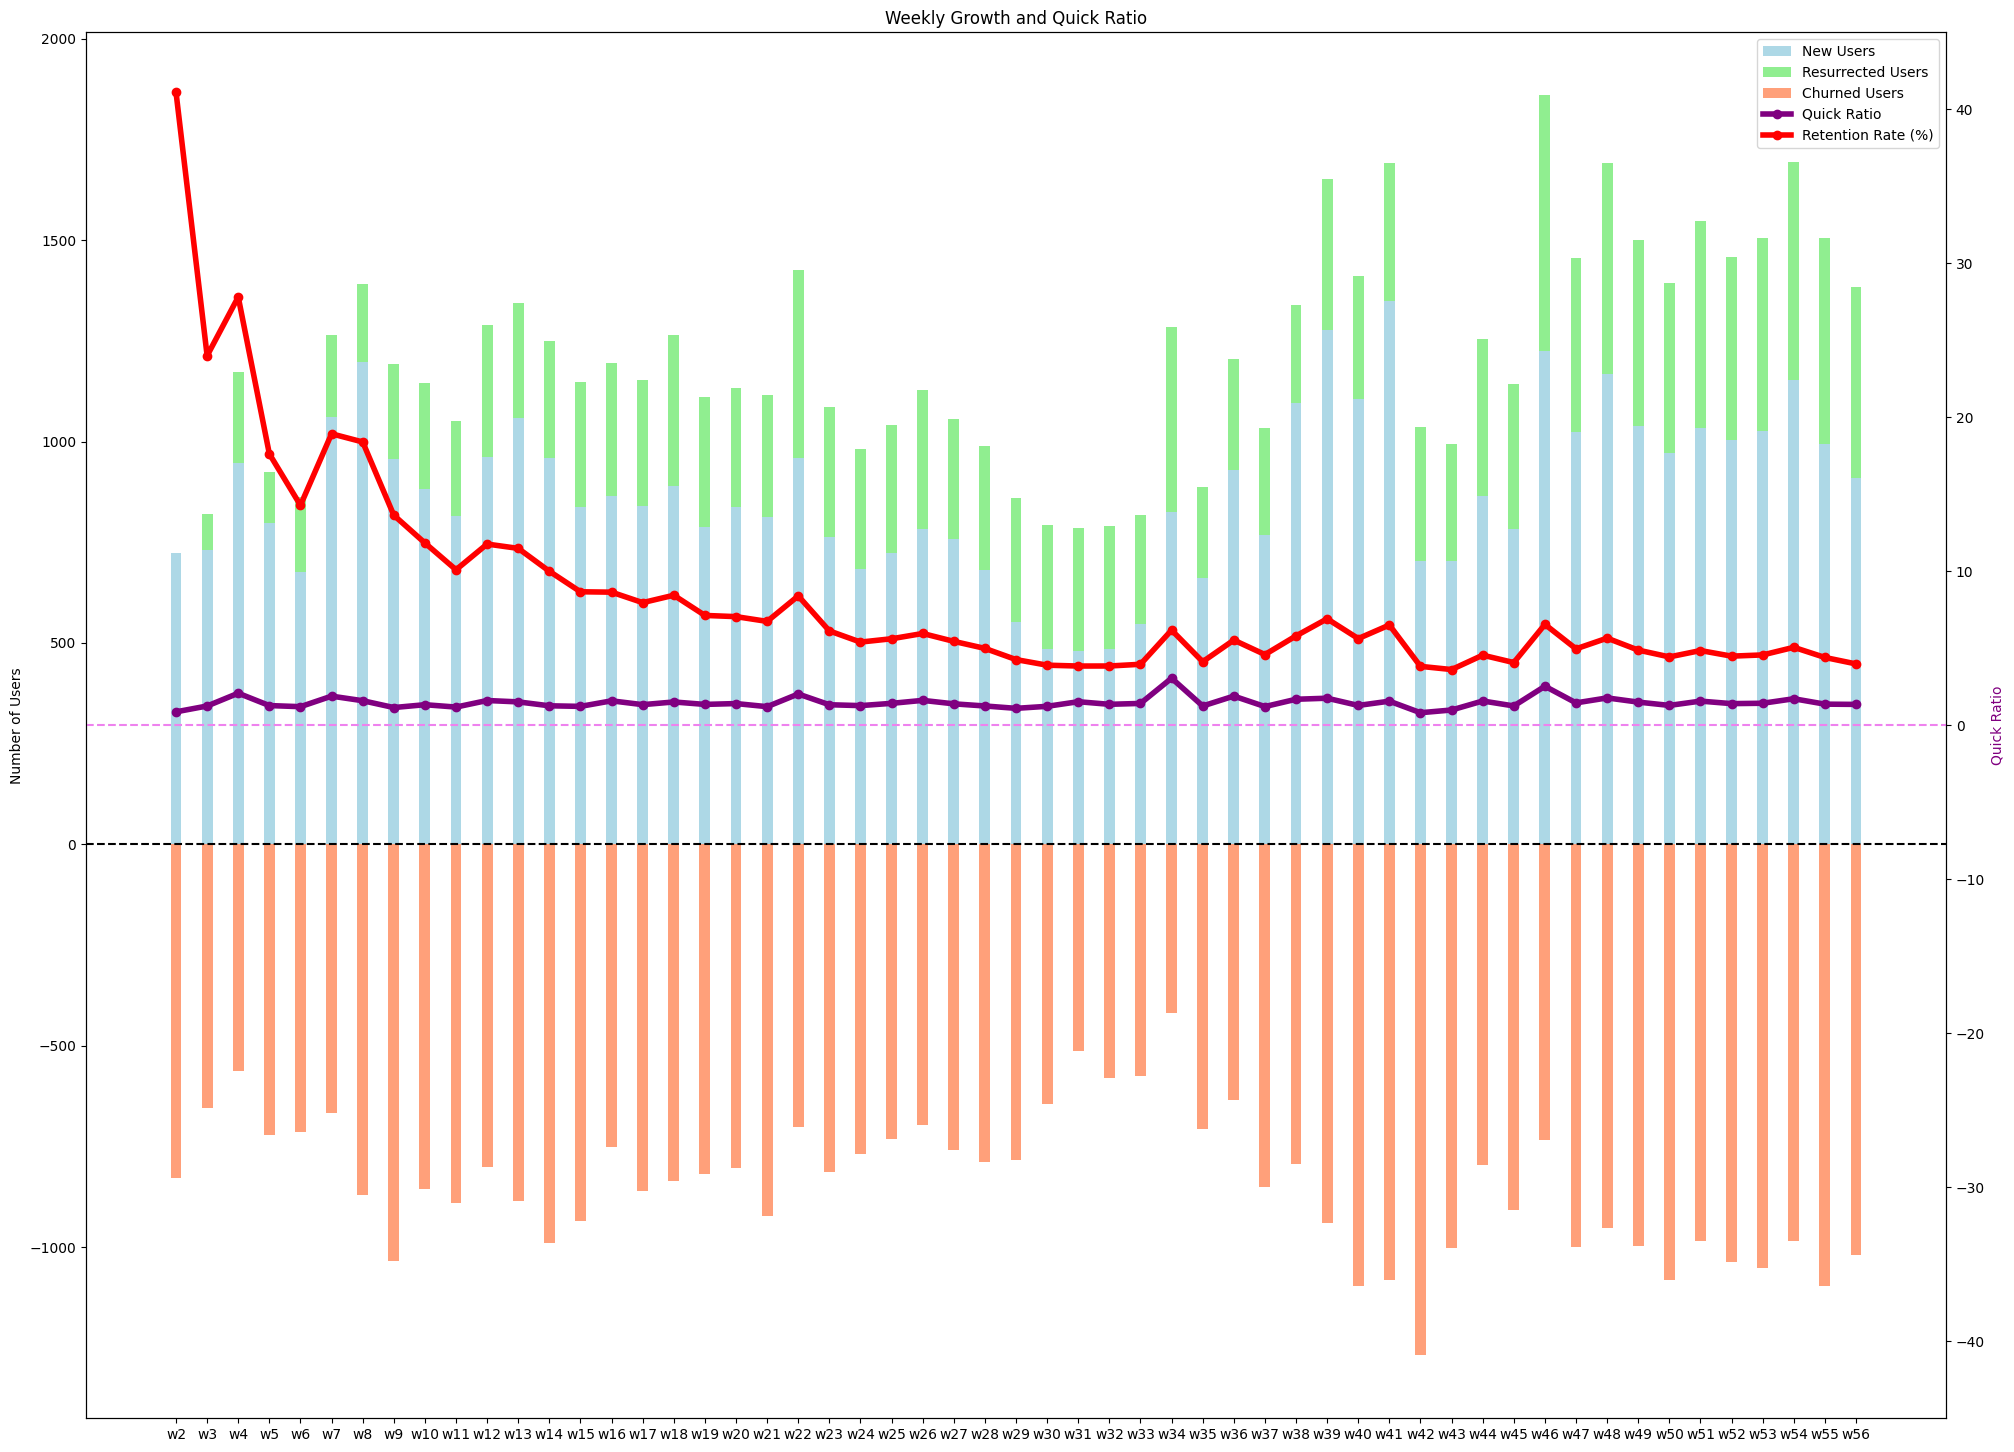

In [130]:

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(24, 18))

# Plot bars for New Users and Resurrected Users on ax1 (twin axis)
ax2 = ax1.twinx()
bar_width = 0.35
weeks = metrics_df['Week']
ax1.bar(weeks, metrics_df['New Users'], width=bar_width, color='lightblue', label='New Users')
ax1.bar(weeks, metrics_df['Resurrected Users'], width=bar_width, color='lightgreen', label='Resurrected Users', bottom=metrics_df['New Users'])
ax1.bar(weeks, -metrics_df['Churned Users'], width=bar_width, color='lightsalmon', label='Churned Users')

# Plot line for Quick Ratio on ax2
color = 'purple'
ax2.set_xlabel('Week')
ax2.set_ylabel('Quick Ratio', color=color)
ax2.plot(metrics_df['Week'], metrics_df['Quick Ratio'], linewidth=4, marker='o', color=color, label='Quick Ratio')
ax2.plot(metrics_df['Week'], metrics_df['Retention Rate (%)'], linewidth=4, marker='o', color='red', label='Retention Rate (%)')

# Adjust y-axis labels and title
ax1.set_ylabel('Number of Users')
ax2.set_ylabel('Quick Ratio', color=color)
ax2.set_ylim([-45,45])

# Add horizontal line at y=0 on ax1
ax1.axhline(y=0, color='black', linestyle='--')
ax2.axhline(y=0, color='violet', linestyle='--')


# Set title and legends
plt.title('Weekly Growth and Quick Ratio')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

# Rotate x-axis labels for better readability
plt.xticks(weeks, rotation=45)

# Show plot
plt.show()


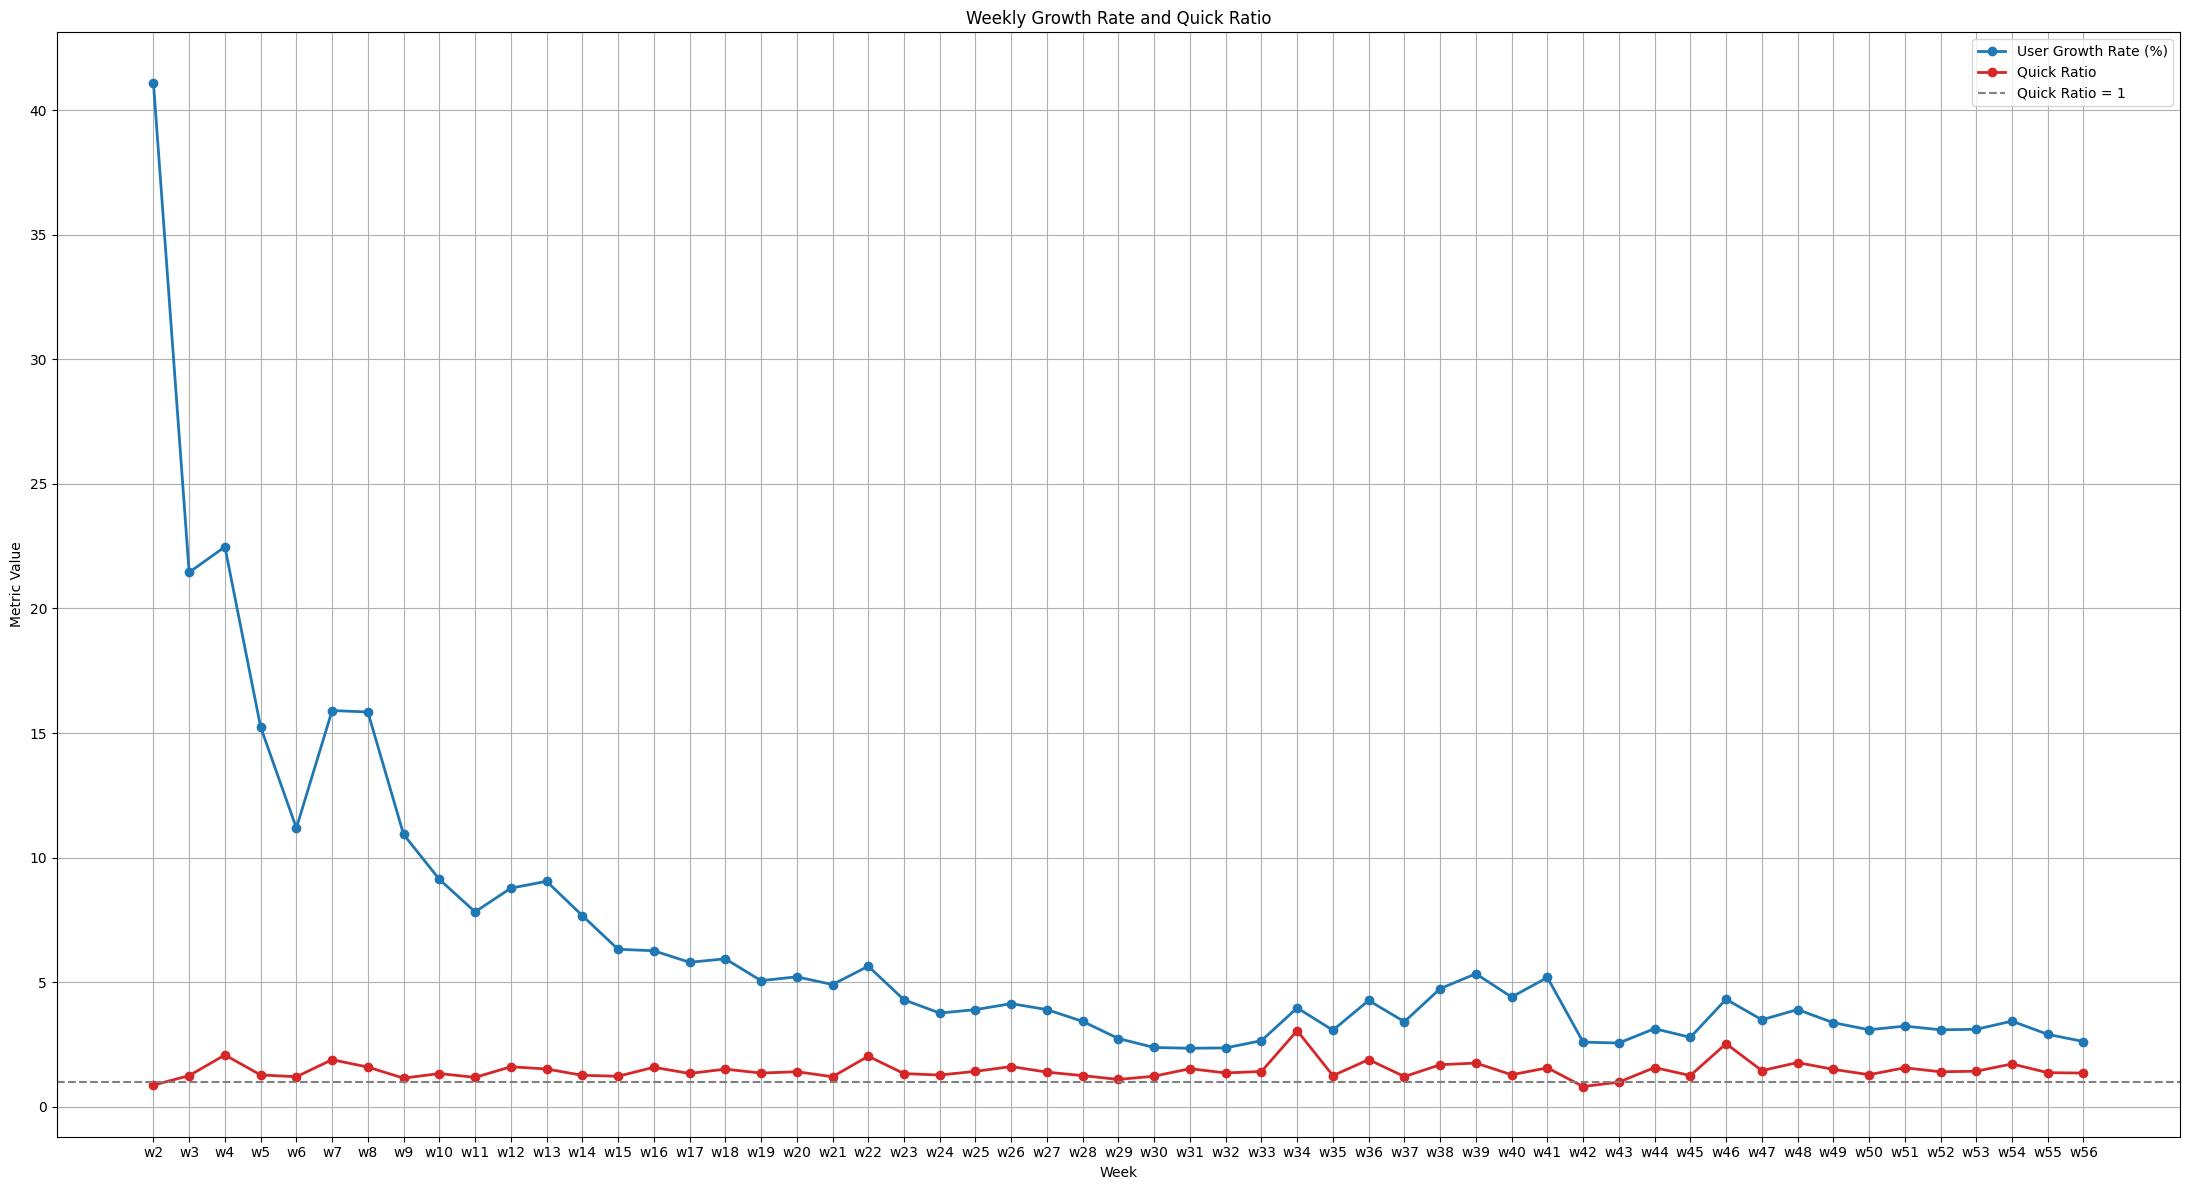

In [136]:
plt.figure(figsize=(22, 12))

# Plot for Growth Rate
plt.plot(metrics_df['Week'], metrics_df['User Growth Rate (%)'], marker='o', color='tab:blue', linewidth=2, label='User Growth Rate (%)')

# Plot for Quick Ratio
plt.plot(metrics_df['Week'], metrics_df['Quick Ratio'], marker='o', color='tab:red', linewidth=2, label='Quick Ratio')

# Add horizontal line at quick ratio = 1 for reference
plt.axhline(y=1, color='gray', linestyle='--', label='Quick Ratio = 1')

# Add labels and title
plt.xlabel('Week')
plt.ylabel('Metric Value')
plt.title('Weekly Growth Rate and Quick Ratio')
plt.xticks(metrics_df['Week'])
plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

## Anlaysis


Analyzing the data and the graph reveals that while the number of new users fluctuates each week. However, it is noteworthy that while the growth rate of new users remains positive, it is showing a decreasing trend. This indicates that although more users are joining over time, the pace at which new users are being added is gradually slowing down.

Analyzing the quick ratio reveals that it remains positive, indicating that our app or product is effectively retaining users. The consistently positive quick ratio suggests that our user engagement and retention strategies are successfully encouraging continued use and re-engagement, leading to a stable and growing user base over time.

Analyzing both the growth rate and the quick ratio, it is evident that while we are effectively retaining our existing users, the rate of attracting new users is not as robust as desired. This suggests that our product/app may benefit from strategic updates and enhancements aimed at increasing its appeal to potential new users. By implementing innovative features and improvements, we can bolster user acquisition and drive sustained growth.